In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import kurtosis, skew

In [3]:
data= []

time = []

curr_X = []
curr_Y = []

delta_X = []
delta_Y = []

delta_time = []

disp = []

nonX = []
nonY = []
nonS = []


for i in range(2,3):
    participant = i
    zeros = 4 - len(str(participant))
    data.append(pd.read_csv("data\Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t"))


    time.append(data[-1]['Eyetracker timestamp'])
    curr_X.append(data[-1]['Gaze point X'])
    curr_Y.append(data[-1]['Gaze point Y'])
    delta_X.append(np.diff(curr_X[-1]))
    delta_Y.append(np.diff(curr_Y[-1]))
    delta_time.append(np.diff(time[-1]))
    disp.append(np.sqrt(np.diff(curr_X[-1])**2 + np.diff(curr_Y[-1])**2))
    #speed.append(disp[-1]/delta_time[-1])

    #remove NaN/missing
    #nonX.append(d_X[-1][np.logical_not(np.isnan(d_X[-1]))])
    #nonY.append(d_Y[-1][np.logical_not(np.isnan(d_Y[-1]))])
    #nonS.append(d_S[-1][np.logical_not(np.isnan(d_S[-1]))])


In [4]:
test = pd.read_csv("data\Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t")

In [29]:
x_val3 = test.iloc[:, 39:40].values
y_val3 = test.iloc[:, 40:41].values
t_stamps3 = test.iloc[:, 0:1].values

x_val2 = np.array(x_val3).sum(axis=1)
y_val2 = np.array(y_val3).sum(axis=1)
t_stamps2 = np.array(t_stamps3).sum(axis=1)

#print(x_val2[6])
#print(y_val2[6])
print(len(x_val2))
print(len(y_val2))
print(len(t_stamps2))

x_val = []
y_val = []
t_stamps = []

for i in range(len(x_val2)):
    if math.isnan(x_val2[i]):
        pass
    elif math.isnan(y_val2[i]):
        pass
    else:
        x_val.append(x_val2[i])
        y_val.append(y_val2[i])
        t_stamps.append(t_stamps2[i])
        
print(len(x_val))
print(len(y_val))
print(len(t_stamps))


46556
46556
46556
41174
41174
41174


In [30]:
# Feature Duration

print("Timestamps")
#print(fix_timestamp)

duration_diff = []

#t_stamps = test.iloc[:, 0:1].values
        
#print(len(t_stamps))  

#Print diff in timestamps for easy feature seperation

for i in range(len(x_val)-1):
    
    if math.isnan(t_stamps[i+1] - t_stamps[i]):
        pass
    else:
        duration_diff.append(t_stamps[i+1] - t_stamps[i])

#print(duration_diff)
print(len(duration_diff))




Timestamps
41173


In [32]:
# Feature Displacement

point_disp = []  
x_point_len = []
y_point_len = []
    
for i in range(len(x_val)-1):
    
    x_point_len.append(x_val[i+1] - x_val[i])
    
    y_point_len.append(y_val[i+1] - y_val[i])
        
    point_disp.append(np.sqrt(x_point_len[i]**2 + y_point_len[i]**2))

print(len(point_disp))
#print(point_disp)


41173


41173


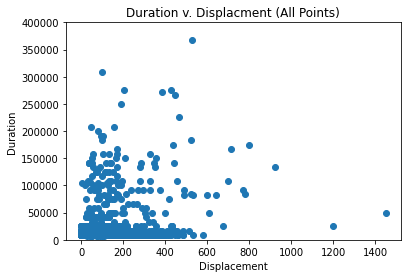

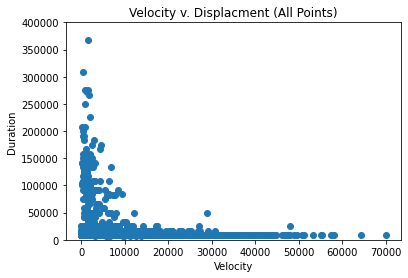

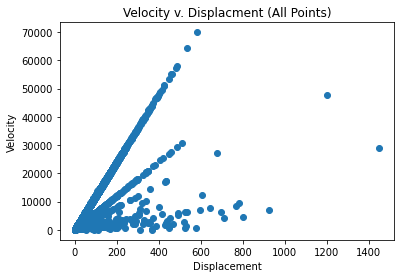

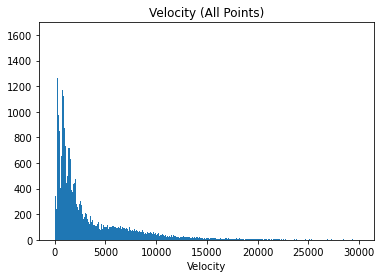

In [60]:
#Velocity

point_velo = []
    
for i in range(len(point_disp)):
        
    point_velo.append(point_disp[i]/(duration_diff[i]/1000000))

print(len(point_velo))

plt.scatter(point_disp,duration_diff)
plt.xlabel("Displacement")
plt.ylim(0, 400000)
#plt.xlim(0, 3.5)
plt.ylabel("Duration")
plt.title("Duration v. Displacment (All Points)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.scatter(point_velo,duration_diff)
plt.xlabel("Velocity")
plt.ylim(0, 400000)
#plt.xlim(0, 3.5)
plt.ylabel("Duration")
plt.title("Velocity v. Displacment (All Points)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.scatter(point_disp,point_velo)
plt.ylabel("Velocity")
#plt.ylim(0, 400000)
#plt.xlim(0, 3.5)
plt.xlabel("Displacement")
plt.title("Velocity v. Displacment (All Points)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.hist(point_velo,500,range=[0,30000])
plt.title("Velocity (All Points)")
plt.xlabel("Velocity")
plt.show()

31549
9620
[-0.8830042272610119, -22.326381170674374, -7.368543218858096, -37.84468295042282]
4


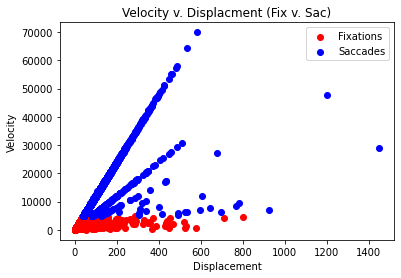

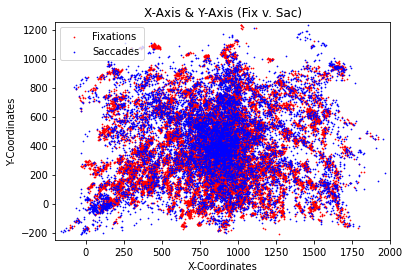

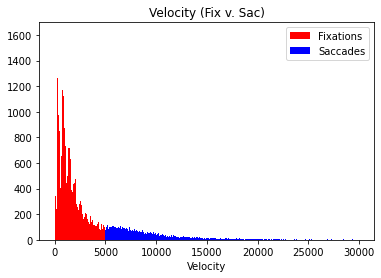

In [77]:
#I-VT

x_fix = []
y_fix = []

x_sac = []
y_sac = []

fix_timestamp = []
sac_timestamp = []

fix_duration = []
sac_duration = []

fix_displacement = []
sac_displacement = []

fix_velo = []
sac_velo = []

classifier = []

outliers = []

velocity_threshold = 5000

for i in range (len(point_velo)):
    if point_velo[i] >= 0 and point_velo[i] < velocity_threshold:
        x_fix.append(x_val[i+1])
        y_fix.append(y_val[i+1])
        fix_timestamp.append(t_stamps[i+1])
        fix_duration.append(duration_diff[i])
        fix_displacement.append(point_disp[i])
        fix_velo.append(point_velo[i])
        classifier.append("fixation")
        
    elif point_velo[i] >= velocity_threshold:
        x_sac.append(x_val[i+1])
        y_sac.append(y_val[i+1])
        sac_timestamp.append(t_stamps[i+1])
        sac_duration.append(duration_diff[i])
        sac_displacement.append(point_disp[i])
        sac_velo.append(point_velo[i])
        classifier.append("saccade")
        
    else:
        outliers.append(point_velo[i])

print(len(x_fix))

print(len(x_sac))

#print(len(x_sac + y_sac))

print(outliers)
print(len(outliers))

#print(classifier)

plt.scatter(fix_displacement,fix_velo, c="red",label="Fixations")
plt.scatter(sac_displacement,sac_velo, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Velocity")
#plt.ylim(0, 400000)
#plt.xlim(0, 3.5)
plt.xlabel("Displacement")
plt.title("Velocity v. Displacment (Fix v. Sac)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.scatter(x_fix,y_fix, s=0.5, c="red",label="Fixations")
plt.scatter(x_sac,y_sac, s=0.5, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.hist(fix_velo,500,range=[0,30000], color ="red",label="Fixations")
plt.hist(sac_velo,500,range=[0,30000], color ="blue",label="Saccades")
plt.legend()
plt.title("Velocity (Fix v. Sac)")
plt.xlabel("Velocity")
plt.show()

In [ ]:
#Angle
#Define boundaries for feature seperation (a certain amount of time needs to pass for a feature to be "ended")

fix_disP = []  
x_fixLen = []
y_fixLen = []
    
for i in range(len(x_fix)-1):
    
    x_fixLen.append(x_fix[i+1] - x_fix[i])
    
    y_fixLen.append(y_fix[i+1] - y_fix[i])
        
    fix_disP.append(np.sqrt(x_fixLen[i]**2 + y_fixLen[i]**2))
    

fix_theta_np = []

ang_time_f2 = []

fix_duration_diff_corr = []

for i in range(len(fix_duration_diff)-1):
    vec1 = [np.array(x_fixLen[i]).sum(axis=0), np.array(y_fixLen[i]).sum(axis=0)]
    vec2 = [np.array(x_fixLen[i+1]).sum(axis=0), np.array(y_fixLen[i+1]).sum(axis=0)]
 
    unit1 = vec1 / np.linalg.norm(vec1)
    unit2 = vec2 / np.linalg.norm(vec2)
    dot_product = np.dot(unit1, unit2)
    #print(np.arccos(dot_product))
    
    if (math.isnan(np.arccos(dot_product))):
        pass
    else:
        fix_theta_np.append(math.pi - np.arccos(dot_product))
        ang_time_f2.append(fix_timestamp[i+1]/1000000)
        fix_duration_diff_corr.append(fix_duration_diff)
        
print(len(fix_theta_np))

print(len(fix_duration_diff_corr))

#print(fix_duration_diff)
        
#print(len(fix_duration_diff_corr))




fix_duration_lengths = []
fix_disp_lengths = []

fix_feat_disp = 0 

fix_count = 0
fix_duration_set = 0

fix_theta_np_avg = 0

fix_feat_theta_avg = []
        
for i in range (len(fix_duration_diff_corr)):
    
    if (fix_duration_diff[i] < 100000):
        fix_count = fix_count + 1
        #count up individual lengths
        
        if (fix_duration_diff[i] < 0):
            pass
        else:
            fix_duration_set = fix_duration_set + fix_duration_diff[i]
            fix_feat_disp = fix_feat_disp + fix_point_disP[i]
            fix_theta_np_avg = fix_theta_np_avg + fix_theta_np[i]
    
        #print(fix_duration_diff[i])
        
    else:
        
        if (fix_count <= 1):
            #discard
            #print(fix_count)
            fix_count = 0 #reset
            fix_duration_set = 0
            fix_feat_disp = 0
            
        else:
            #append
            #print(fix_count)
            fix_duration_lengths.append(fix_duration_set)
            fix_duration_set = 0
            fix_disp_lengths.append(fix_feat_disp)
            fix_feat_theta_avg.append(fix_theta_np_avg/fix_count)
            fix_theta_np_avg = 0
            fix_feat_disp = 0
            fix_count = 0 #reset 
        
print(len(fix_feat_theta_avg))
        
plt.hist(fix_feat_theta_avg)
plt.show()
        
#print(count)
    
#print(len(fix_duration_lengths))

#print(fix_duration_lengths)

#When features "transition" or "end", append total time of that feature (sum of the time differences for each point in a fixation or saccade group)
    #Note: you may have to delete the first summation (deduct first point from itself)
    #A counter will be necessary to "reset" fixations, or omit singular isolated points classified as fixations
    
#Plot hisogram of each list, with their contained feature durations

#print(fix_duration_lengths)